In [ ]:
# Code taken and modified from https://www.geeksforgeeks.org/understanding-logistic-regression/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
url = 'https://raw.githubusercontent.com/Romeless/BigData_LogisticRegression/main/admission.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,serial,gre,toefl,rating,sop,lor,cgpa,research,chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
## Drop unnecessary columns
df = df.drop(['serial'], axis=1)
df.head()

,gre,toefl,rating,sop,lor,cgpa,research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       500 non-null    int64  
 1   toefl     500 non-null    int64  
 2   rating    500 non-null    int64  
 3   sop       500 non-null    float64
 4   lor       500 non-null    float64
 5   cgpa      500 non-null    float64
 6   research  500 non-null    int64  
 7   chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df['chance'] = df['chance'].round(0).astype('int64')
df.head()

,gre,toefl,rating,sop,lor,cgpa,research,chance
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


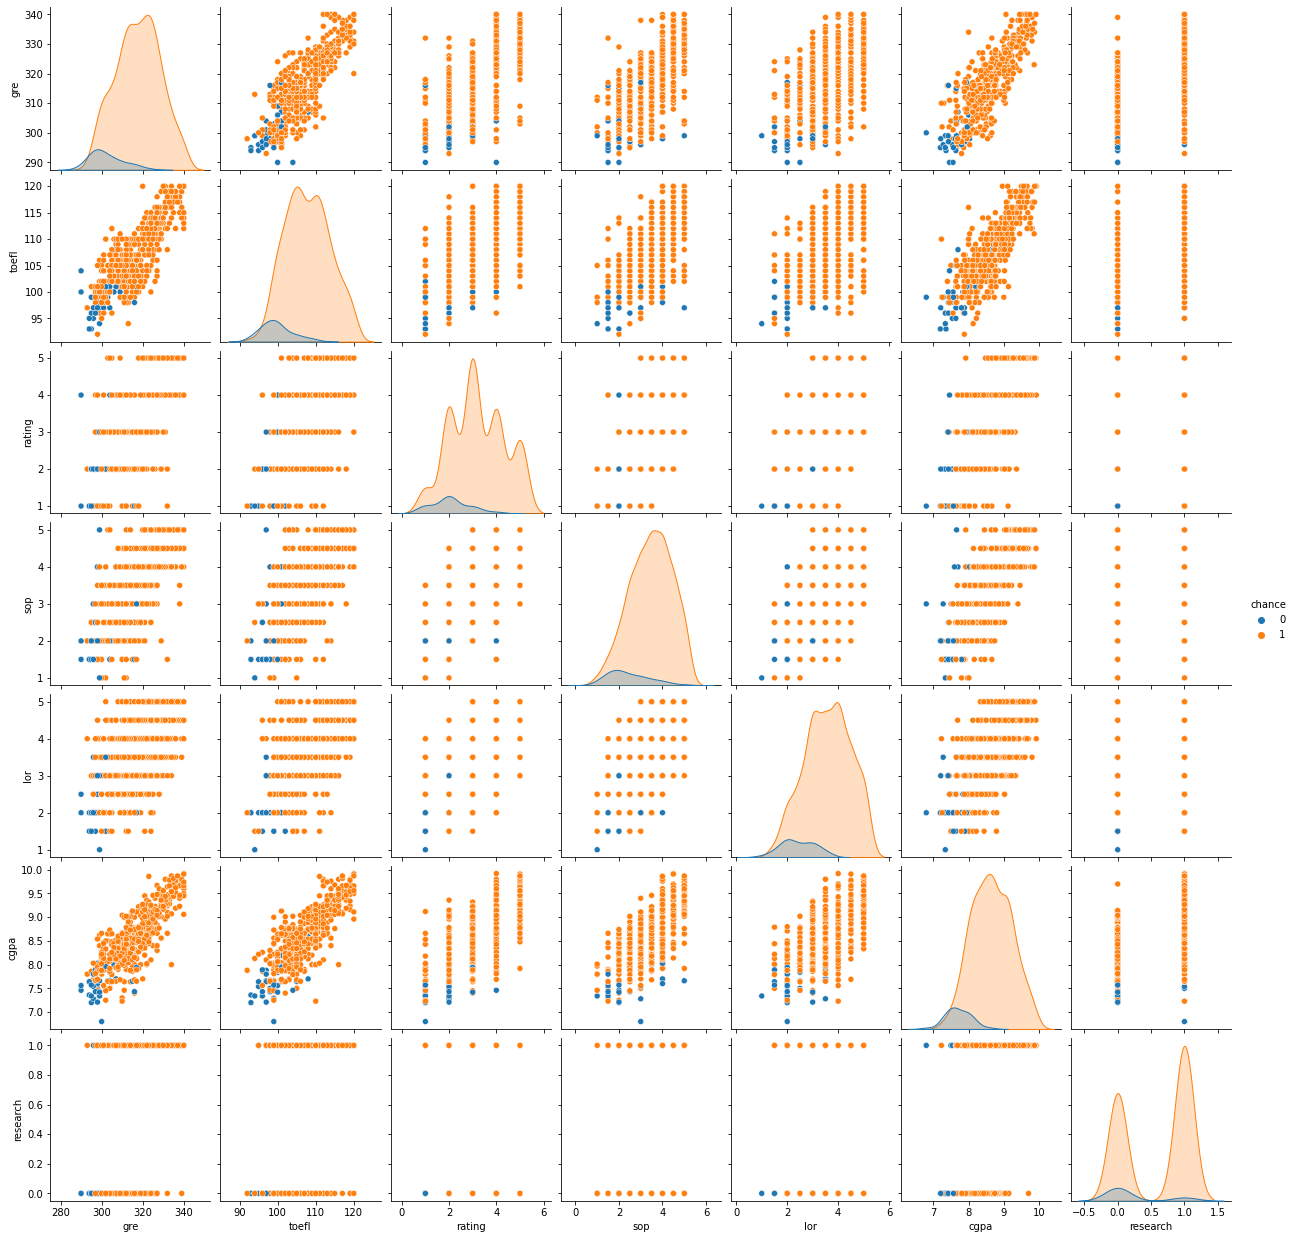

In [8]:
sns.pairplot(df, hue='chance', height=2.5)

In [9]:
final_df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
final_df.head()

,gre,toefl,rating,sop,lor,cgpa,research,chance
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,1.0


In [10]:
def sigmoid_function(beta, X):
  ''' 
  logistic(sigmoid) function 
  '''
  return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 

def log_gradient(beta, X, y): 
  ''' 
  logistic gradient function 
  '''
  first_calc = sigmoid_function(beta, X) - y.reshape(X.shape[0], -1) 
  final_calc = np.dot(first_calc.T, X) 
  return final_calc

def cost_func(beta, X, y): 
  ''' 
  cost function, J 
  '''
  log_func_v = sigmoid_function(beta, X) 
  y = np.squeeze(y) 
  step1 = y * np.log(log_func_v) 
  step2 = (1 - y) * np.log(1 - log_func_v) 
  final = -step1 - step2 
  return np.mean(final)

def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
  ''' 
  gradient descent function 
  '''
  costs = []
  cost = cost_func(beta, X, y) 
  change_cost = 1
  num_iter = 1
      
  while(change_cost > converge_change): 
    costs.append(cost)
    old_cost = cost 
    beta = beta - (lr * log_gradient(beta, X, y)) 
    cost = cost_func(beta, X, y) 
    change_cost = old_cost - cost 
    num_iter += 1
      
  return beta, num_iter, costs

def pred_values(beta, X): 
  ''' 
  function to predict labels 
  '''
  pred_prob = sigmoid_function(beta, X) 
  pred_value = np.where(pred_prob >= .5, 1, 0) 
  return np.squeeze(pred_value)

In [11]:
def plot_reg(X, y, beta): 
  ''' 
  function to plot decision boundary 
  '''
  # labelled observations 
  x_0 = X[np.where(y == 0.0)] 
  x_1 = X[np.where(y == 1.0)] 
      
  # plotting points with diff color for diff label 
  plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
  plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
  # plotting decision boundary 
  x1 = np.arange(0, 1, 0.1) 
  x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
  plt.plot(x1, x2, c='k', label='reg line') 
  
  plt.xlabel('x1') 
  plt.ylabel('x2') 
  plt.legend() 
  plt.show() 

In [12]:
X = np.array(final_df)[:, :-1]

In [13]:
# Menambah 1 pada setiap observasi
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
print(X)

[[1.    0.94  0.929 ... 0.875 0.913 1.   ]
 [1.    0.68  0.536 ... 0.875 0.663 1.   ]
 [1.    0.52  0.429 ... 0.625 0.385 1.   ]
 ...
 [1.    0.8   1.    ... 1.    0.885 1.   ]
 [1.    0.44  0.393 ... 1.    0.522 0.   ]
 [1.    0.74  0.75  ... 0.875 0.718 0.   ]]


In [14]:
# Response Vector
y = np.array(final_df)[:, -1]
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [15]:
beta = np.matrix(np.zeros(X.shape[1]))
print(beta)

[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
beta, num_iter, costs = grad_desc(X, y, beta)

In [17]:
print("Estimated regression coefficients:", beta) 
print("No. of iterations:", num_iter) 

Estimated regression coefficients: [[-4.058  2.325  3.097 -0.627 -1.619  3.447  9.142  0.008]]
No. of iterations: 938


In [18]:
# predicted labels 
y_pred = pred_values(beta, X) 

In [19]:
# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(y == y_pred)) 
print("Accuracy:", np.sum(y == y_pred)/X.shape[0])

Correctly predicted labels: 473
Accuracy: 0.946


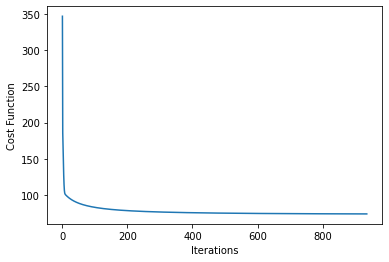

In [20]:
plt.plot(costs) # plotting by columns
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()